## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  40.674305   330.402129  0.484761  4.894742  1.183973
1  91.915333   668.374669  0.820965  3.702849  1.560309
2  77.398654   610.302901  0.001203  4.107644 -0.126705
3  45.120961   617.208914  0.130247  7.245840  1.013948
4  66.645206  1363.294707  0.685177  4.935380  1.496423


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.28722 | train_mse: 4.48348 | train_mae: 1.49441 |  0:00:00s
epoch 1  | loss: 0.61655 | train_mse: 2.94064 | train_mae: 1.08805 |  0:00:00s
epoch 2  | loss: 0.55162 | train_mse: 1.70783 | train_mae: 0.92121 |  0:00:00s


epoch 3  | loss: 0.41471 | train_mse: 1.4944  | train_mae: 0.82205 |  0:00:00s
epoch 4  | loss: 0.50375 | train_mse: 1.1243  | train_mae: 0.70949 |  0:00:00s
epoch 5  | loss: 0.50478 | train_mse: 0.85483 | train_mae: 0.59755 |  0:00:00s


epoch 6  | loss: 0.38908 | train_mse: 1.02016 | train_mae: 0.7243  |  0:00:00s
epoch 7  | loss: 0.34731 | train_mse: 1.10132 | train_mae: 0.72613 |  0:00:00s
epoch 8  | loss: 0.34751 | train_mse: 0.95543 | train_mae: 0.66283 |  0:00:00s


epoch 9  | loss: 0.38723 | train_mse: 0.71797 | train_mae: 0.5795  |  0:00:01s
epoch 10 | loss: 0.2373  | train_mse: 0.67837 | train_mae: 0.56895 |  0:00:01s
epoch 11 | loss: 0.21775 | train_mse: 0.9156  | train_mae: 0.64544 |  0:00:01s


epoch 12 | loss: 0.43198 | train_mse: 0.57057 | train_mae: 0.57348 |  0:00:01s
epoch 13 | loss: 0.26376 | train_mse: 0.38243 | train_mae: 0.47402 |  0:00:01s
epoch 14 | loss: 0.29619 | train_mse: 0.40772 | train_mae: 0.47651 |  0:00:01s


epoch 15 | loss: 0.29214 | train_mse: 0.46425 | train_mae: 0.4732  |  0:00:01s
epoch 16 | loss: 0.23456 | train_mse: 0.32823 | train_mae: 0.42353 |  0:00:01s
epoch 17 | loss: 0.18459 | train_mse: 0.33365 | train_mae: 0.41762 |  0:00:01s


epoch 18 | loss: 0.15268 | train_mse: 0.49531 | train_mae: 0.49709 |  0:00:01s
epoch 19 | loss: 0.14584 | train_mse: 0.63708 | train_mae: 0.53529 |  0:00:02s
epoch 20 | loss: 0.20637 | train_mse: 0.7937  | train_mae: 0.56667 |  0:00:02s


epoch 21 | loss: 0.19068 | train_mse: 0.61556 | train_mae: 0.5004  |  0:00:02s
epoch 22 | loss: 0.12373 | train_mse: 0.22593 | train_mae: 0.34997 |  0:00:02s


epoch 23 | loss: 0.31363 | train_mse: 0.17434 | train_mae: 0.3195  |  0:00:02s
epoch 24 | loss: 0.19177 | train_mse: 0.31046 | train_mae: 0.39732 |  0:00:02s
epoch 25 | loss: 0.17966 | train_mse: 0.542   | train_mae: 0.48755 |  0:00:02s


epoch 26 | loss: 0.18487 | train_mse: 0.38487 | train_mae: 0.43269 |  0:00:02s
epoch 27 | loss: 0.18664 | train_mse: 0.35985 | train_mae: 0.41517 |  0:00:02s


epoch 28 | loss: 0.30642 | train_mse: 0.22458 | train_mae: 0.34681 |  0:00:03s
epoch 29 | loss: 0.15536 | train_mse: 0.20542 | train_mae: 0.30899 |  0:00:03s


epoch 30 | loss: 0.15968 | train_mse: 0.14515 | train_mae: 0.27979 |  0:00:03s
epoch 31 | loss: 0.17467 | train_mse: 0.12095 | train_mae: 0.26067 |  0:00:03s
epoch 32 | loss: 0.17094 | train_mse: 0.12835 | train_mae: 0.26892 |  0:00:03s


epoch 33 | loss: 0.16185 | train_mse: 0.17525 | train_mae: 0.29826 |  0:00:03s
epoch 34 | loss: 0.12706 | train_mse: 0.21493 | train_mae: 0.32384 |  0:00:03s
epoch 35 | loss: 0.39286 | train_mse: 0.31801 | train_mae: 0.36602 |  0:00:03s


epoch 36 | loss: 0.14683 | train_mse: 0.29555 | train_mae: 0.36775 |  0:00:03s
epoch 37 | loss: 0.13137 | train_mse: 0.1977  | train_mae: 0.30318 |  0:00:04s


epoch 38 | loss: 0.27125 | train_mse: 0.14683 | train_mae: 0.27315 |  0:00:04s
epoch 39 | loss: 0.15112 | train_mse: 0.14082 | train_mae: 0.28101 |  0:00:04s
epoch 40 | loss: 0.20601 | train_mse: 0.1721  | train_mae: 0.29278 |  0:00:04s


epoch 41 | loss: 0.13688 | train_mse: 0.17434 | train_mae: 0.29032 |  0:00:04s
epoch 42 | loss: 0.21249 | train_mse: 0.11177 | train_mae: 0.24943 |  0:00:04s
epoch 43 | loss: 0.17461 | train_mse: 0.10761 | train_mae: 0.25151 |  0:00:04s


epoch 44 | loss: 0.24404 | train_mse: 0.121   | train_mae: 0.25888 |  0:00:04s
epoch 45 | loss: 0.12368 | train_mse: 0.19835 | train_mae: 0.30846 |  0:00:04s
epoch 46 | loss: 0.16713 | train_mse: 0.18359 | train_mae: 0.29188 |  0:00:04s


epoch 47 | loss: 0.1022  | train_mse: 0.11714 | train_mae: 0.25766 |  0:00:05s
epoch 48 | loss: 0.10783 | train_mse: 0.1022  | train_mae: 0.24833 |  0:00:05s
epoch 49 | loss: 0.19898 | train_mse: 0.14145 | train_mae: 0.27823 |  0:00:05s


epoch 50 | loss: 0.12187 | train_mse: 0.15495 | train_mae: 0.28953 |  0:00:05s
epoch 51 | loss: 0.10032 | train_mse: 0.12063 | train_mae: 0.25935 |  0:00:05s
epoch 52 | loss: 0.31518 | train_mse: 0.10045 | train_mae: 0.24937 |  0:00:05s


epoch 53 | loss: 0.13106 | train_mse: 0.08501 | train_mae: 0.22645 |  0:00:05s
epoch 54 | loss: 0.27991 | train_mse: 0.08363 | train_mae: 0.22559 |  0:00:05s
epoch 55 | loss: 0.09326 | train_mse: 0.0973  | train_mae: 0.2404  |  0:00:05s


epoch 56 | loss: 0.08952 | train_mse: 0.09616 | train_mae: 0.23856 |  0:00:05s
epoch 57 | loss: 0.14563 | train_mse: 0.08653 | train_mae: 0.22583 |  0:00:05s
epoch 58 | loss: 0.16125 | train_mse: 0.0815  | train_mae: 0.22294 |  0:00:05s


epoch 59 | loss: 0.30467 | train_mse: 0.08876 | train_mae: 0.23183 |  0:00:06s
epoch 60 | loss: 0.09402 | train_mse: 0.08998 | train_mae: 0.23798 |  0:00:06s
epoch 61 | loss: 0.26421 | train_mse: 0.08306 | train_mae: 0.22742 |  0:00:06s


epoch 62 | loss: 0.08893 | train_mse: 0.08181 | train_mae: 0.2228  |  0:00:06s
epoch 63 | loss: 0.17841 | train_mse: 0.07393 | train_mae: 0.2107  |  0:00:06s
epoch 64 | loss: 0.24022 | train_mse: 0.07334 | train_mae: 0.21711 |  0:00:06s


epoch 65 | loss: 0.17965 | train_mse: 0.07576 | train_mae: 0.21773 |  0:00:06s
epoch 66 | loss: 0.12274 | train_mse: 0.07277 | train_mae: 0.20343 |  0:00:06s
epoch 67 | loss: 0.20564 | train_mse: 0.07192 | train_mae: 0.20411 |  0:00:06s


epoch 68 | loss: 0.15983 | train_mse: 0.06332 | train_mae: 0.19785 |  0:00:07s
epoch 69 | loss: 0.1469  | train_mse: 0.06105 | train_mae: 0.19262 |  0:00:07s
epoch 70 | loss: 0.20236 | train_mse: 0.06806 | train_mae: 0.20047 |  0:00:07s


epoch 71 | loss: 0.24266 | train_mse: 0.07034 | train_mae: 0.20174 |  0:00:07s
epoch 72 | loss: 0.08727 | train_mse: 0.0659  | train_mae: 0.20291 |  0:00:07s
epoch 73 | loss: 0.09132 | train_mse: 0.07619 | train_mae: 0.21582 |  0:00:07s


epoch 74 | loss: 0.10816 | train_mse: 0.06602 | train_mae: 0.20224 |  0:00:07s
epoch 75 | loss: 0.12305 | train_mse: 0.06056 | train_mae: 0.19339 |  0:00:07s
epoch 76 | loss: 0.18206 | train_mse: 0.04863 | train_mae: 0.1766  |  0:00:07s


epoch 77 | loss: 0.06848 | train_mse: 0.05678 | train_mae: 0.18137 |  0:00:07s
epoch 78 | loss: 0.10766 | train_mse: 0.06538 | train_mae: 0.19174 |  0:00:07s
epoch 79 | loss: 0.12632 | train_mse: 0.06056 | train_mae: 0.18281 |  0:00:08s


epoch 80 | loss: 0.04686 | train_mse: 0.07455 | train_mae: 0.20068 |  0:00:08s
epoch 81 | loss: 0.18747 | train_mse: 0.07318 | train_mae: 0.20027 |  0:00:08s
epoch 82 | loss: 0.12911 | train_mse: 0.10385 | train_mae: 0.22122 |  0:00:08s


epoch 83 | loss: 0.13331 | train_mse: 0.14217 | train_mae: 0.25399 |  0:00:08s
epoch 84 | loss: 0.17946 | train_mse: 0.18128 | train_mae: 0.28586 |  0:00:08s
epoch 85 | loss: 0.14802 | train_mse: 0.10906 | train_mae: 0.2316  |  0:00:08s


epoch 86 | loss: 0.08112 | train_mse: 0.08113 | train_mae: 0.21235 |  0:00:08s
epoch 87 | loss: 0.0939  | train_mse: 0.07022 | train_mae: 0.1994  |  0:00:08s
epoch 88 | loss: 0.11759 | train_mse: 0.06481 | train_mae: 0.18992 |  0:00:08s


epoch 89 | loss: 0.17161 | train_mse: 0.07055 | train_mae: 0.19464 |  0:00:08s
epoch 90 | loss: 0.291   | train_mse: 0.09293 | train_mae: 0.21945 |  0:00:09s
epoch 91 | loss: 0.1075  | train_mse: 0.08163 | train_mae: 0.20099 |  0:00:09s


epoch 92 | loss: 0.08652 | train_mse: 0.06033 | train_mae: 0.18302 |  0:00:09s
epoch 93 | loss: 0.0776  | train_mse: 0.05209 | train_mae: 0.17396 |  0:00:09s
epoch 94 | loss: 0.18822 | train_mse: 0.05015 | train_mae: 0.17134 |  0:00:09s


epoch 95 | loss: 0.06207 | train_mse: 0.04505 | train_mae: 0.15607 |  0:00:09s
epoch 96 | loss: 0.07567 | train_mse: 0.03854 | train_mae: 0.14721 |  0:00:09s
epoch 97 | loss: 0.05274 | train_mse: 0.03593 | train_mae: 0.14409 |  0:00:09s


epoch 98 | loss: 0.09775 | train_mse: 0.04012 | train_mae: 0.15658 |  0:00:09s
epoch 99 | loss: 0.06866 | train_mse: 0.04543 | train_mae: 0.16505 |  0:00:09s
epoch 100| loss: 0.05892 | train_mse: 0.05402 | train_mae: 0.16949 |  0:00:09s


epoch 101| loss: 0.08872 | train_mse: 0.0556  | train_mae: 0.17013 |  0:00:10s
epoch 102| loss: 0.06378 | train_mse: 0.06635 | train_mae: 0.18557 |  0:00:10s
epoch 103| loss: 0.07669 | train_mse: 0.05793 | train_mae: 0.17552 |  0:00:10s


epoch 104| loss: 0.08097 | train_mse: 0.05715 | train_mae: 0.17657 |  0:00:10s
epoch 105| loss: 0.14518 | train_mse: 0.0824  | train_mae: 0.20328 |  0:00:10s
epoch 106| loss: 0.10974 | train_mse: 0.08071 | train_mae: 0.20047 |  0:00:10s


epoch 107| loss: 0.08322 | train_mse: 0.06982 | train_mae: 0.19031 |  0:00:10s
epoch 108| loss: 0.15498 | train_mse: 0.05904 | train_mae: 0.17948 |  0:00:10s
epoch 109| loss: 0.17507 | train_mse: 0.05709 | train_mae: 0.17621 |  0:00:10s


epoch 110| loss: 0.09507 | train_mse: 0.07592 | train_mae: 0.20349 |  0:00:10s
epoch 111| loss: 0.20977 | train_mse: 0.10194 | train_mae: 0.23129 |  0:00:10s
epoch 112| loss: 0.13235 | train_mse: 0.10413 | train_mae: 0.22541 |  0:00:11s


epoch 113| loss: 0.10855 | train_mse: 0.06515 | train_mae: 0.18663 |  0:00:11s
epoch 114| loss: 0.15063 | train_mse: 0.05392 | train_mae: 0.17587 |  0:00:11s
epoch 115| loss: 0.06184 | train_mse: 0.05373 | train_mae: 0.17757 |  0:00:11s


epoch 116| loss: 0.06027 | train_mse: 0.05268 | train_mae: 0.17008 |  0:00:11s
epoch 117| loss: 0.23195 | train_mse: 0.05812 | train_mae: 0.18146 |  0:00:11s
epoch 118| loss: 0.18433 | train_mse: 0.06918 | train_mae: 0.20048 |  0:00:11s


epoch 119| loss: 0.19889 | train_mse: 0.07122 | train_mae: 0.19605 |  0:00:11s
epoch 120| loss: 0.16803 | train_mse: 0.07311 | train_mae: 0.19421 |  0:00:11s
epoch 121| loss: 0.12198 | train_mse: 0.08876 | train_mae: 0.20878 |  0:00:11s


epoch 122| loss: 0.16408 | train_mse: 0.10024 | train_mae: 0.21936 |  0:00:11s
epoch 123| loss: 0.09187 | train_mse: 0.108   | train_mae: 0.22727 |  0:00:11s
epoch 124| loss: 0.13114 | train_mse: 0.08611 | train_mae: 0.2102  |  0:00:12s


epoch 125| loss: 0.13224 | train_mse: 0.09352 | train_mae: 0.2164  |  0:00:12s
epoch 126| loss: 0.08205 | train_mse: 0.11358 | train_mae: 0.23073 |  0:00:12s
epoch 127| loss: 0.12261 | train_mse: 0.1269  | train_mae: 0.24031 |  0:00:12s


epoch 128| loss: 0.1627  | train_mse: 0.08707 | train_mae: 0.20994 |  0:00:12s
epoch 129| loss: 0.14854 | train_mse: 0.05773 | train_mae: 0.18123 |  0:00:12s
epoch 130| loss: 0.10015 | train_mse: 0.07532 | train_mae: 0.19971 |  0:00:12s


epoch 131| loss: 0.13649 | train_mse: 0.10006 | train_mae: 0.22331 |  0:00:12s
epoch 132| loss: 0.07932 | train_mse: 0.13777 | train_mae: 0.24781 |  0:00:12s
epoch 133| loss: 0.08945 | train_mse: 0.13319 | train_mae: 0.24067 |  0:00:12s


epoch 134| loss: 0.16018 | train_mse: 0.1046  | train_mae: 0.22026 |  0:00:12s
epoch 135| loss: 0.16961 | train_mse: 0.11359 | train_mae: 0.2304  |  0:00:13s


epoch 136| loss: 0.14296 | train_mse: 0.11197 | train_mae: 0.22138 |  0:00:13s
epoch 137| loss: 0.13217 | train_mse: 0.12282 | train_mae: 0.23435 |  0:00:13s
epoch 138| loss: 0.06096 | train_mse: 0.12898 | train_mae: 0.24084 |  0:00:13s


epoch 139| loss: 0.13014 | train_mse: 0.0793  | train_mae: 0.20094 |  0:00:13s
epoch 140| loss: 0.08229 | train_mse: 0.06344 | train_mae: 0.18814 |  0:00:13s
epoch 141| loss: 0.07792 | train_mse: 0.05993 | train_mae: 0.18627 |  0:00:13s


epoch 142| loss: 0.24492 | train_mse: 0.1053  | train_mae: 0.23291 |  0:00:13s
epoch 143| loss: 0.2181  | train_mse: 0.09948 | train_mae: 0.22774 |  0:00:13s
epoch 144| loss: 0.07364 | train_mse: 0.06189 | train_mae: 0.18647 |  0:00:13s


epoch 145| loss: 0.15476 | train_mse: 0.05278 | train_mae: 0.17731 |  0:00:13s
epoch 146| loss: 0.27023 | train_mse: 0.05856 | train_mae: 0.19061 |  0:00:14s


epoch 147| loss: 0.07212 | train_mse: 0.05358 | train_mae: 0.18211 |  0:00:14s

Early stopping occurred at epoch 147 with best_epoch = 97 and best_train_mae = 0.14409
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

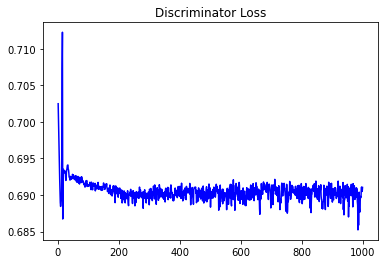

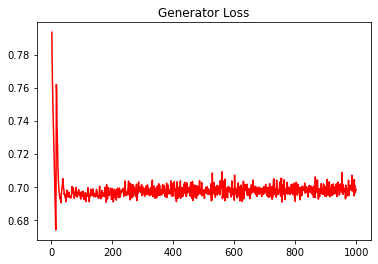

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13527825104587524


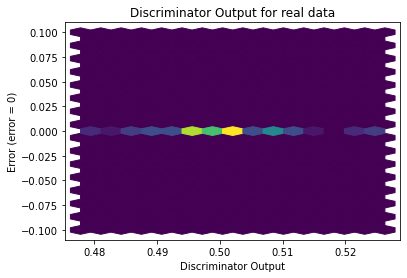

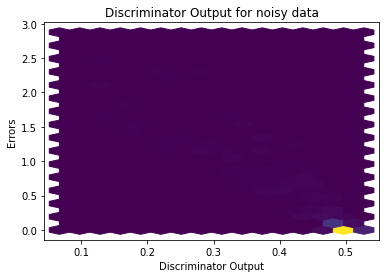

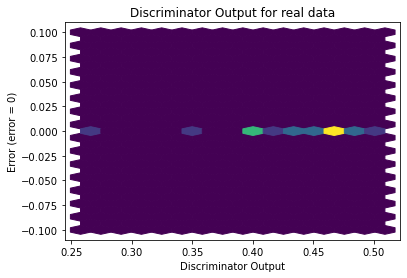

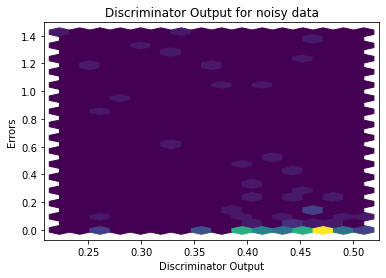

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


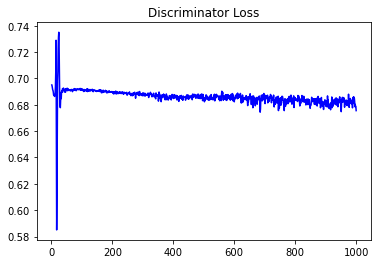

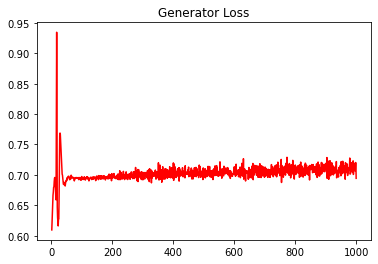

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1065772346636723


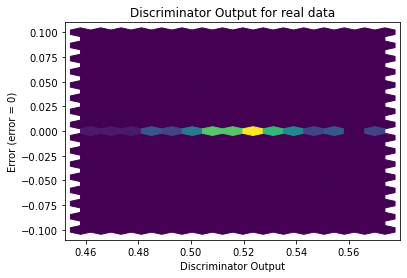

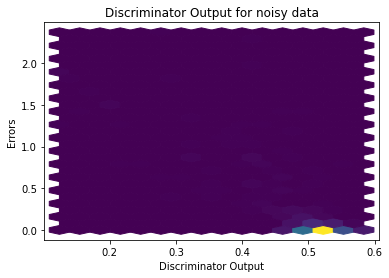

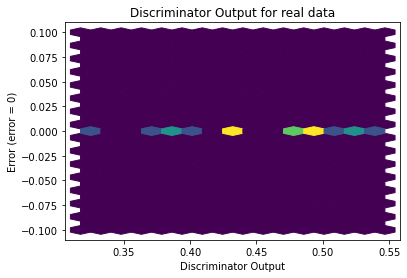

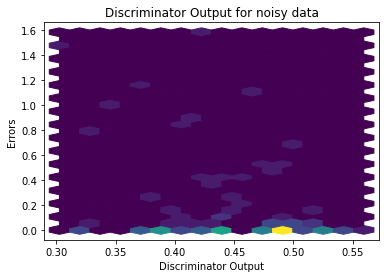

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7543]], requires_grad=True)
